# Murder count by weapon (1999-2013)

Uses data from the 2003, 2008, and 2013 Crime in the US reports to make a data set of murder weapon data. The values are murder victim counts by weapon type and year.

## Caveats
0. These years are compared directly to each other, without controlling for anything including population changes.

## Open questions
0. When the data caveats say "traffic not included" does that mean traffic murders are not included? Or would that be somehow categorized into one of these weapons?

In [2]:
%matplotlib inline
import glob
import pandas as pd

In [3]:
weapons_raw_2009_2013 = pd.read_excel('cius_data/cius2013datatables/Expanded_Homicide_Data_Table_8_Murder_Victims_by_Weapon_2009-2013.xls')
weapons_raw_2009_2013 = weapons_raw_2009_2013.drop(['Unnamed: 6', 'Unnamed: 7'], axis=1)
weapons_raw_2009_2013.columns = ['Weapon', '2009', '2010', '2011', '2012', '2013']
weapons_raw_2009_2013 = weapons_raw_2009_2013[3:21]
weapons_raw_2009_2013 = weapons_raw_2009_2013.replace('Personal weapons (hands, fists, feet, etc.)1', 'Personal weapons (hands, fists, feet, etc.)')

In [4]:
weapons_raw_2004_2008 = pd.read_excel('cius_data/CIUS2008datatables/08shrtbl08.xls')
weapons_raw_2004_2008 = weapons_raw_2004_2008.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis=1)
weapons_raw_2004_2008.columns = ['Weapon', '2004', '2005', '2006', '2007', '2008']
weapons_raw_2004_2008 = weapons_raw_2004_2008[3:21]
weapons_raw_2004_2008 = weapons_raw_2004_2008.replace('Personal weapons (hands, fists, feet, etc.)1', 'Personal weapons (hands, fists, feet, etc.)')

In [5]:
# downloaded from https://ucr.fbi.gov/crime-in-the-u.s/2003
# data does not include murder victim counts for 9/11/2001
weapons_raw_1999_2003 = pd.read_excel('cius_data/cius2003data/table2-9_weapon99-03.xls')
weapons_raw_1999_2003 = weapons_raw_1999_2003.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis=1)
weapons_raw_1999_2003.columns = ['Weapon', '1999', '2000', '2001', '2002', '2003']
weapons_raw_1999_2003 = weapons_raw_1999_2003[3:21]
weapons_raw_1999_2003 = weapons_raw_1999_2003.replace('Personal weapons (hands, fists, feet, etc.)2', 'Personal weapons (hands, fists, feet, etc.)')

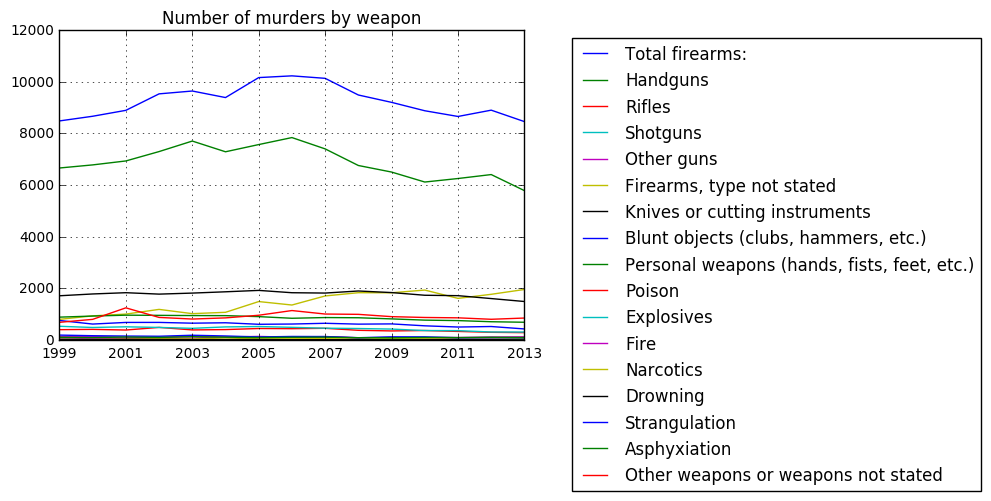

In [20]:
weapons_total = pd.merge(weapons_raw_1999_2003, weapons_raw_2004_2008, on='Weapon')
weapons_total = weapons_total.merge(weapons_raw_2009_2013, on='Weapon')
weapons_total = weapons_total.transpose()
columns = weapons_total.loc['Weapon']
weapons_total.columns = columns
weapons_total = weapons_total.iloc[1:]
weapons_total = weapons_total.drop('Total', axis=1)
weapons_total.plot(grid=True, title='Number of murders by weapon').legend(bbox_to_anchor=(2, 1))

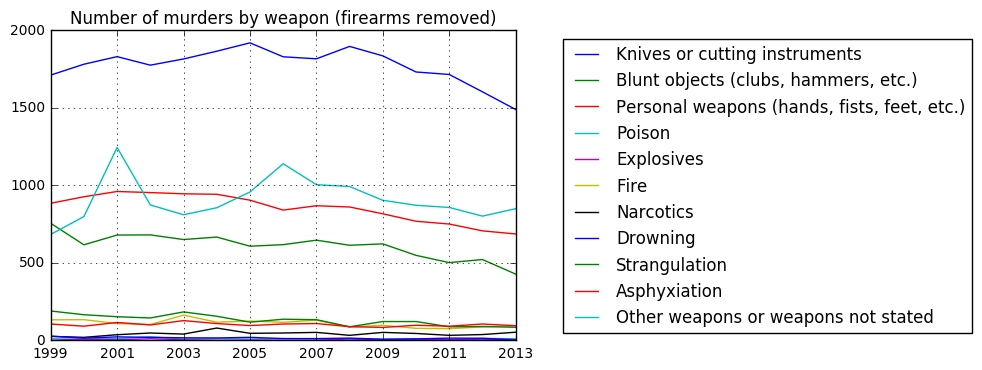

In [19]:
no_guns = weapons_total.iloc[:,6:]
no_guns.plot(grid=True, title='Number of murders by weapon (firearms removed)').legend(bbox_to_anchor=(2, 1))